In many practical data science activities, the data set will contain categorical variables. These variables are typically stored as text values”. Since machine learning is based on mathematical equations, it would cause a problem when we keep categorical variables as is. 

Many algorithms support categorical values without further manipulation, but in those cases, it’s still a topic of discussion on whether to encode the variables or not. The algorithms that do not support categorical values, in that case, are left with encoding methodologies.

# Encoding Methodologies

## Nominal Encoding: — Where Order of data does not matter

In Nominal Encoding we have various techniques:

- One Hot Encoding
- One Hot Encoding With Many Categories
- Mean Encoding

## Ordinal Encoding: — Where Order of data matters

In Ordinal Encoding we also have various techniques

1. Label Encoding
2. Target Guided Ordinal Encoding

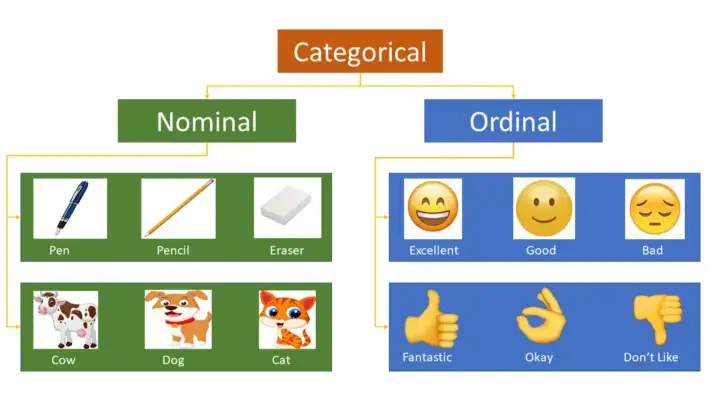

## Label Encoding

In this encoding each category is assigned a value from 1 through N (here N is the number of category for the feature). It may look like (Car<Bus<Truck ….0 < 1 < 2). Categories that have some ties or are close to each other lose some information after encoding.

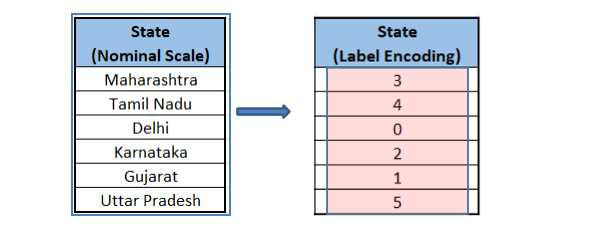

### Example: Label Encoding

### 1. Load the data

In [ ]:
import numpy as np
import pandas as pd

bank_data = pd.read_csv("Banking_Marketing.csv")

# displaying top 5 rows
print(bank_data.head())

# displaying rows and columns
print(bank_data.shape)

### 2. Drop any NA values

In [ ]:
# Checking for the NA values in the data

bank_data.isnull().sum()

### 3. Exclude the Numerical columns for encoding

In [ ]:
bank_data1 = bank_data.dropna()
bank_data1

# checking for the null values
bank_data1.isnull().sum()

### 4. Categorical columns after excluding the numerical values

In [ ]:
bank_data_cat = bank_data1.select_dtypes(include="object")
bank_data_cat

### 5. The Categorical columns are below

In [ ]:
bank_data_cat.columns

In [ ]:
bank_data_cat.nunique()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
bank_data_cat['job'].hist()
plt.xticks(rotation=45)

#### 7. Looping through the "bank_data_cat" to encode each categorical columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

bank_data_encoded = LE.fit_transform(bank_data_cat)
bank_data_encoded.head()

In [ ]:
for i in bank_data_cat:
    bank_data_cat[i] = LE.fit_transform(bank_data_cat[i])
print(bank_data_cat.head())    

# ONE-HOT ENCODING

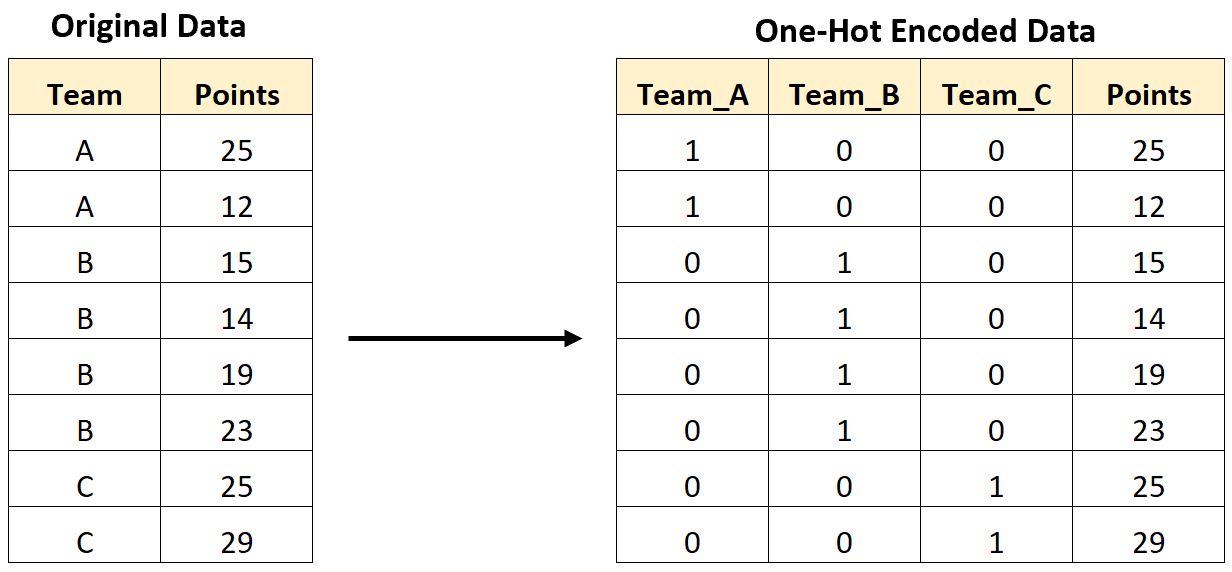

### Example : One-Hot Encoding

## 1. Load the data

In [2]:
import pandas as pd
import numpy as np

dataset_1 = pd.read_csv("Banking_Marketing.csv")
dataset_1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44.0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53.0,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28.0,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39.0,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55.0,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41194,104.0,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41195,2.0,housemaid,married,Basic,unknown,no,n,NaN,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41196,3.0,admin.,single,university.degree,unknown,yes,y,NaN,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41197,NaN,technician,married,professional.course,no,no,n,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


## 2. Drop any NA values

In [3]:
dataset_1=dataset_1.dropna()

## 3. Exclude the Numerical columns for encoding¶

In [4]:
dataset_column_category = dataset_1.select_dtypes(exclude=[np.number]).columns

## 4. Categorical columns after excluding the numerical values

In [5]:
dataset_column_category

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [7]:
dataset_1[dataset_column_category].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,nonexistent
1,technician,married,unknown,no,no,no,cellular,nov,fri,nonexistent
2,management,single,university.degree,no,yes,no,cellular,jun,thu,success
3,services,married,high.school,no,no,no,cellular,apr,fri,nonexistent
4,retired,married,basic.4y,no,yes,no,cellular,aug,fri,success


### 5. We divide each labels of the categorical columns into individual columns using the OneHotEncoder

In [8]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoding = OneHotEncoder(sparse=False)
one_hotEncoded = one_hot_encoding.fit_transform(dataset_1[dataset_column_category])

In [9]:
one_hotEncoded

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

### 7. Creating a new dataframe for the OneHotEncoded columns

In [10]:
new_onehot_encoded_dataFrame = pd.DataFrame(one_hotEncoded,
                                            columns=one_hot_encoding.get_feature_names(dataset_column_category))

C:\Users\Administrator.LAB-STUDENT\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [11]:
new_onehot_encoded_dataFrame.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### One-hot Encoded columns

In [12]:
new_onehot_encoded_dataFrame.columns

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',

## One Hot Encoding using Dummy Varaibles

In [13]:
dataset_1 = pd.read_csv("Banking_Marketing.csv")
dataset_1=dataset_1.dropna()
dataset_column_category = dataset_1.select_dtypes(exclude=[np.number]).columns
print(dataset_column_category)
dataset_1[dataset_column_category].head()

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,nonexistent
1,technician,married,unknown,no,no,no,cellular,nov,fri,nonexistent
2,management,single,university.degree,no,yes,no,cellular,jun,thu,success
3,services,married,high.school,no,no,no,cellular,apr,fri,nonexistent
4,retired,married,basic.4y,no,yes,no,cellular,aug,fri,success


In [16]:
onehot_dummyEncoding = pd.get_dummies(dataset_1[dataset_column_category],prefix=dataset_column_category)

In [17]:
onehot_dummyEncoding.columns

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',